# Technical Indicators

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


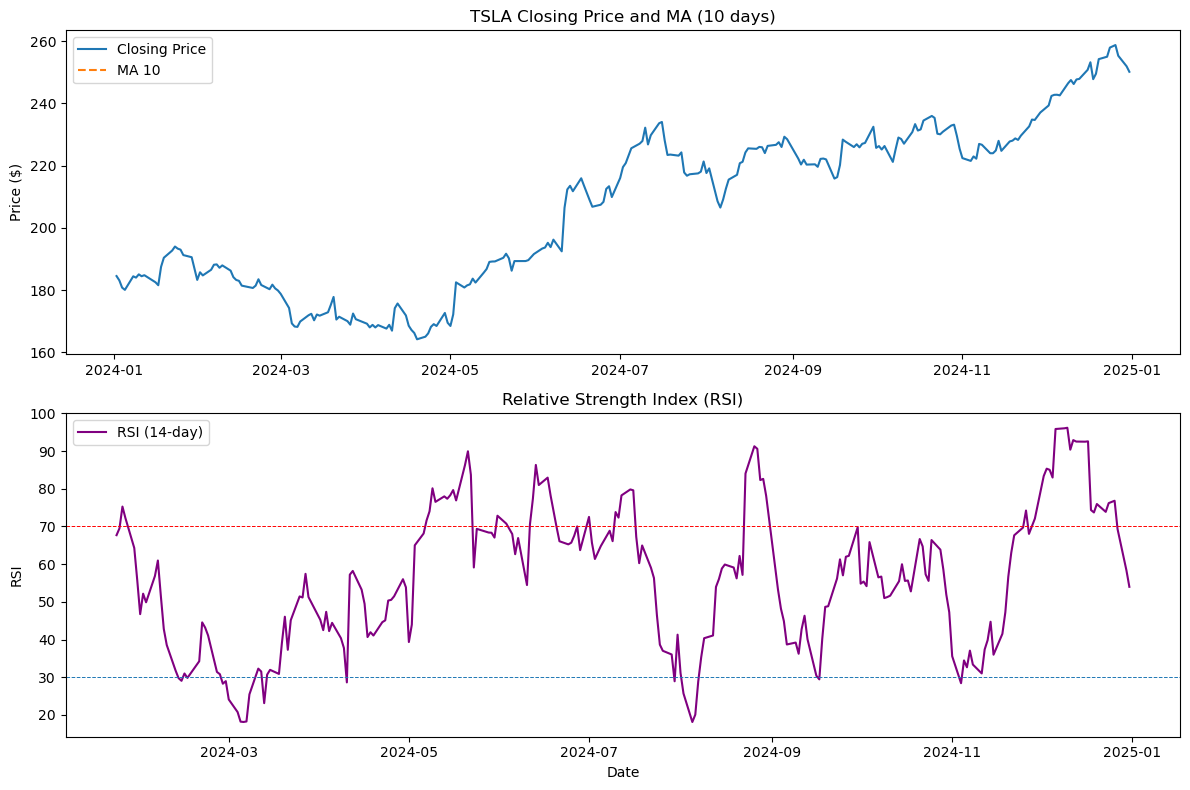

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download stock data
stock = yf.download('AAPL', start="2024-01-01", end="2025-01-01")

# Calculate 10-day moving average (MA)
stock['MA_10'] = stock['Close'].rolling(window=10).mean()

# RSI Calculation:
delta = stock['Close'].diff()

# Gains (positive changes) and losses (negative changes)
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)  # Note the correct syntax here

# Calculate the average gain and average loss
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()

# Calculate RSI
rs = average_gain / average_loss
stock['RSI'] = 100 - (100 / (1 + rs))

# Plot results clearly:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Closing Price & MA_10
ax1.plot(stock['Close'], label='Closing Price')
stock['MA_10'] = stock['Close'].rolling(window=10).mean()
ax1.plot(stock['MA_10'], linestyle='--', label='MA 10')
ax1.set_title('TSLA Closing Price and MA (10 days)')
ax1.set_ylabel('Price ($)')
ax1.legend()

# RSI
ax2.plot(stock['RSI'], label='RSI (14-day)', color='purple')
ax2.axhline(70, color='red', linestyle='--', linewidth=0.7)
ax2.axhline(30, linestyle='--', linewidth=0.7)
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend()

plt.tight_layout()
plt.show()



# Lag Features


In [2]:
stock['Lag_1'] = stock['Close'].shift(1)
stock['Lag_2'] = stock['Close'].shift(2)
stock['Lag_3'] = stock['Close'].shift(3)
print(stock.head())

Price            Close        High         Low        Open    Volume MA_10  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL         
Date                                                                         
2024-01-02  184.532089  187.315382  182.792533  186.033072  82488700   NaN   
2024-01-03  183.150391  184.770668  182.335277  183.120571  58414500   NaN   
2024-01-04  180.824341  181.997291  179.800489  181.062899  71983600   NaN   
2024-01-05  180.098694  181.669266  179.094727  180.903872  62303300   NaN   
2024-01-08  184.452560  184.492330  180.416793  181.003268  59144500   NaN   

Price      RSI       Lag_1       Lag_2       Lag_3  
Ticker                                              
Date                                                
2024-01-02 NaN         NaN         NaN         NaN  
2024-01-03 NaN  184.532089         NaN         NaN  
2024-01-04 NaN  183.150391  184.532089         NaN  
2024-01-05 NaN  180.824341  183.150391  184.532089  
2024

# Rolling Window Statistics

In [3]:
stock['Rolling_Mean_5'] = stock['Close'].rolling(window=5).mean()
stock['Rolling_Median_5'] = stock['Close'].rolling(window=5).median()
stock['Rolling_Std_5'] = stock['Close'].rolling(window=5).std()
print(stock.tail())

Price            Close        High         Low        Open    Volume MA_10  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL         
Date                                                                         
2024-12-24  257.916443  257.926411  255.009620  255.209412  23234700   NaN   
2024-12-26  258.735504  259.814335  257.347047  257.906429  27237100   NaN   
2024-12-27  255.309296  258.415896  252.782075  257.546826  42355300   NaN   
2024-12-30  251.923019  253.221595  250.474615  251.952985  35557500   NaN   
2024-12-31  250.144974  253.001833  249.156056  252.162760  39480700   NaN   

Price             RSI       Lag_1       Lag_2       Lag_3 Rolling_Mean_5  \
Ticker                                                                     
Date                                                                       
2024-12-24  76.180657  254.989655  254.210510  249.515656     252.881967   
2024-12-26  76.812079  257.916443  254.989655  254.210510     255.07355

# Price Volatility

In [4]:
stock['Daily_Volatility'] = stock['Close'].pct_change().rolling(window=5).std()
print(stock.tail())

Price            Close        High         Low        Open    Volume MA_10  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL         
Date                                                                         
2024-12-24  257.916443  257.926411  255.009620  255.209412  23234700   NaN   
2024-12-26  258.735504  259.814335  257.347047  257.906429  27237100   NaN   
2024-12-27  255.309296  258.415896  252.782075  257.546826  42355300   NaN   
2024-12-30  251.923019  253.221595  250.474615  251.952985  35557500   NaN   
2024-12-31  250.144974  253.001833  249.156056  252.162760  39480700   NaN   

Price             RSI       Lag_1       Lag_2       Lag_3 Rolling_Mean_5  \
Ticker                                                                     
Date                                                                       
2024-12-24  76.180657  254.989655  254.210510  249.515656     252.881967   
2024-12-26  76.812079  257.916443  254.989655  254.210510     255.07355

# Sentiment Analysis

In [ ]:
!pip install textblob

In [6]:
from textblob import TextBlob

news_headlines = [
    "Apple reports record profits amid increased iPhone sales.",
    "Tesla faces recall as safety concerns rise over autopilot issues.",
    "Microsoft stock surges following strong quarterly earnings report.",
    "Google hit by massive lawsuit related to privacy concerns.",
    "Amazon to lay off thousands of employees due to declining revenues."
]

for headline in news_headlines:
    sentiment_score = TextBlob(headline).sentiment.polarity
    sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
    print(f"Headline: {headline}")
    print(f"Sentiment Score: {sentiment_score:.2f}, Sentiment: {sentiment_label}\n")


Headline: Apple reports record profits amid increased iPhone sales.
Sentiment Score: 0.00, Sentiment: Neutral

Headline: Tesla faces recall as safety concerns rise over autopilot issues.
Sentiment Score: 0.00, Sentiment: Neutral

Headline: Microsoft stock surges following strong quarterly earnings report.
Sentiment Score: 0.22, Sentiment: Positive

Headline: Google hit by massive lawsuit related to privacy concerns.
Sentiment Score: 0.00, Sentiment: Neutral

Headline: Amazon to lay off thousands of employees due to declining revenues.
Sentiment Score: -0.12, Sentiment: Negative



# Macroeconomic Indicators

In [7]:
economic_data = {'GDP_Growth': [2.1, 2.3, 2.5], 'Unemployment_Rate': [4.5, 4.3, 4.1]}
econ_df = pd.DataFrame(economic_data)
print(econ_df)

   GDP_Growth  Unemployment_Rate
0         2.1                4.5
1         2.3                4.3
2         2.5                4.1
